In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from haversine import haversine
import wget

In [2]:
wget.download('https://www.dropbox.com/s/6opkctgt6no513x/demand_network_0914ver.gz?dl=1')
wget.download('https://www.dropbox.com/s/fkl95n0tpwb9r33/road_network_0914ver.gz?dl=1')
wget.download('https://www.dropbox.com/s/cyy3xmvxdvjfcno/busSTdata?dl=1')

demand_network = nx.read_gpickle('/demand_network_0914ver.gz')
road_network = nx.read_gpickle('/road_network_0914ver.gz')
stn_info= pickle.load(open(root+'/busSTdata', 'rb'))

In [3]:
x,y = [],[]
for idx in stn_info:
    try:
        x.append(stn_info[idx]['lonlat'][0])
        y.append(stn_info[idx]['lonlat'][1])
    except IndexError:
        continue

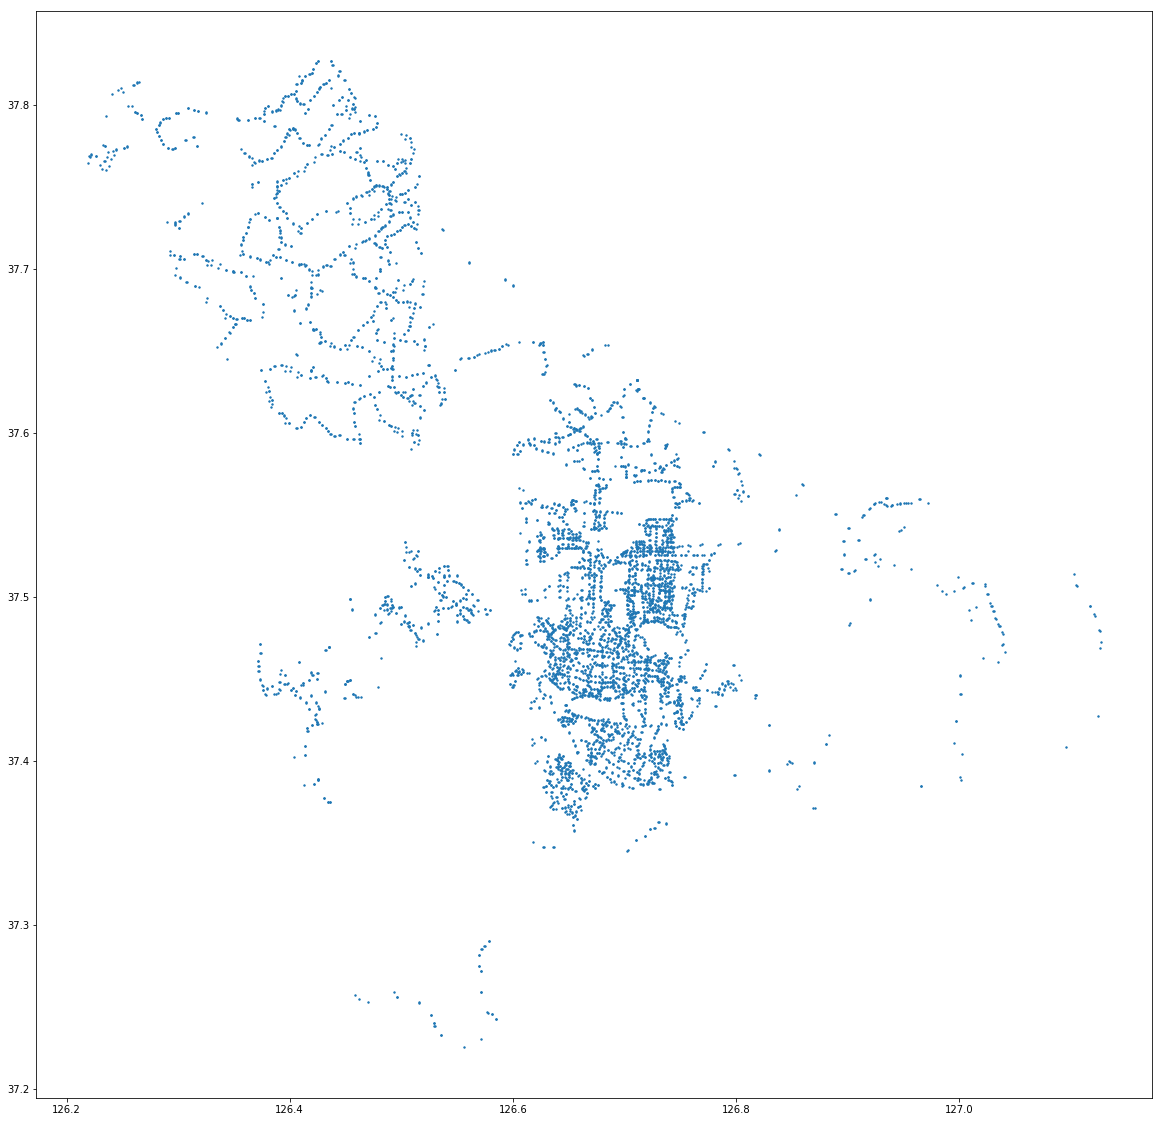

In [4]:
plt.figure(figsize=(20,20))
plt.scatter(x,y,s=2)

# Network2Matrix

In [5]:
def net2mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    for edge in G.edges():
        mat[node_list.index(edge[0]),node_list.index(edge[1])] = G.edges[edge]['demand']
    return node_list,mat

In [8]:
def distance(stn1,stn2):
    stn1_lonlat = stn_info[stn1]['lonlat'][::-1]
    stn2_lonlat = stn_info[stn2]['lonlat'][::-1]
    
    dist = haversine(stn1_lonlat,stn2_lonlat)
    return dist

def net2implement_mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    from tqdm import tqdm
    for stn1 in tqdm(G.nodes()):
        for stn2 in G.nodes():
            if stn1==stn2:continue
            try:
                value = -distance(stn1,stn2)+(-G.edges[(stn1,stn2)]['demand'])
            except:
                value = -distance(stn1,stn2)
            mat[node_list.index(stn1),node_list.index(stn2)] = value
    
    np.fill_diagonal(mat, sum(mat)/(len(node_list)*(len(node_list))-1))
        
    return node_list,mat

def plot_cluster(label,i):
    stn_list = np.where(label==i)[0]
    x,y = [],[]
    for idx in stn_info:
        try:
            x.append(stn_info[idx]['lonlat'][0])
            y.append(stn_info[idx]['lonlat'][1])
        except IndexError:
            continue
    x_ = []
    y_ = []
    for idx in stn_list:
        try:
            x_.append(stn_info[node_idx[idx]]['lonlat'][0])
            y_.append(stn_info[node_idx[idx]]['lonlat'][1])
        except IndexError:
            continue
    plt.figure(figsize=(20,20))
    plt.scatter(x,y,s=2)
    plt.scatter(x_,y_,s=3,c='red')

In [9]:
# node_idx,matrix = net2mat(demand_network)

In [10]:
node_idx,matrix1 = net2implement_mat(demand_network)

100%|████████████████████████████████████████████████████████████████████████████| 5582/5582 [1:11:05<00:00,  1.08it/s]


# AP clustering

In [12]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(affinity = 'precomputed')
model.fit(matrix1)

AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [13]:
len(model.cluster_centers_indices_)

181

# AP Visualizing

In [14]:
x_ = []
y_ = []
for idx in model.cluster_centers_indices_:
    try:
        x_.append(stn_info[node_idx[idx]]['lonlat'][0])
        y_.append(stn_info[node_idx[idx]]['lonlat'][1])
    except IndexError:
        continue

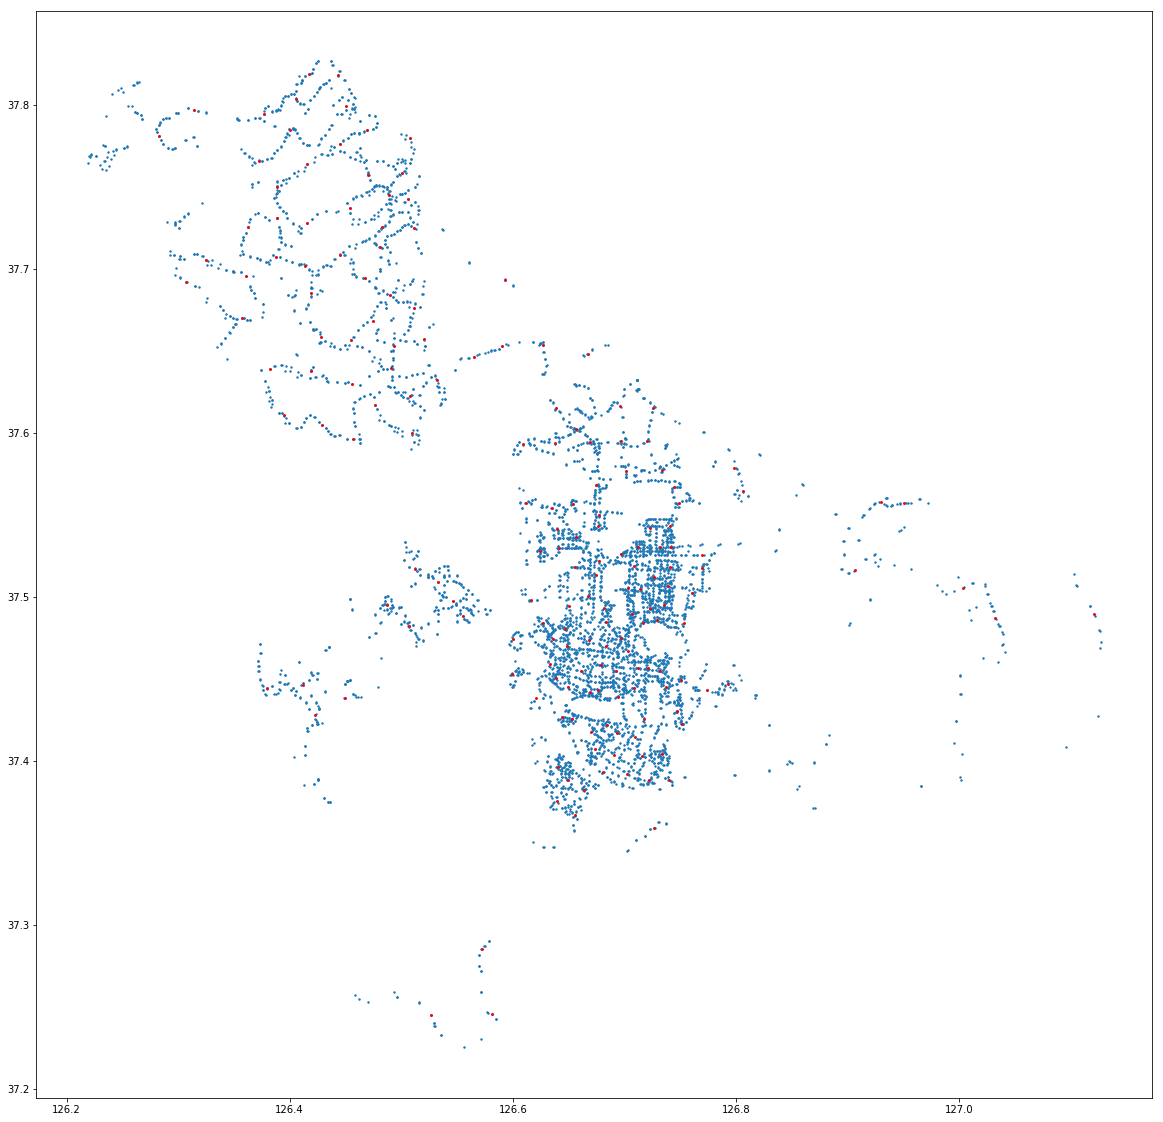

In [15]:
plt.figure(figsize=(20,20))
plt.scatter(x,y,s=2)
plt.scatter(x_,y_,s=3,c='red')

In [16]:
center = model.cluster_centers_indices_

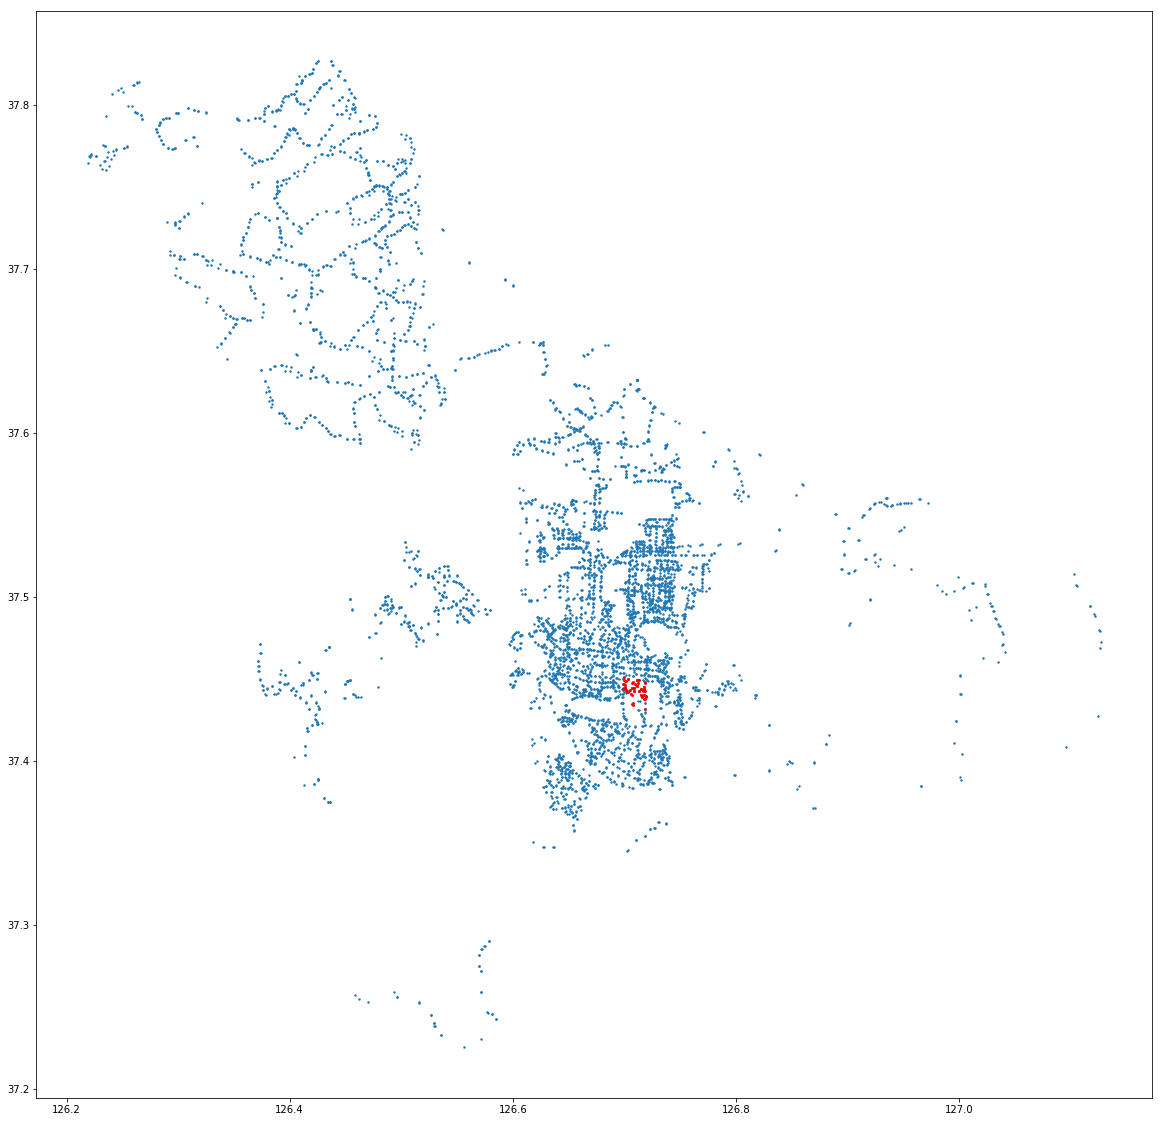

In [17]:
plot_cluster(model.labels_,1)

In [16]:
np.savez('dist_dot_demand',center=center,labels=model.labels_)

In [18]:
for c_ in center:
    print(stn_info[node_idx[c_]]['stationName'])

인하대병원
성리중학교
한진프라자
유호아파트.월곶포구.월곶회센타
도화e편한세상604동
갈산주공2단지
동교동삼거리
청학중학교
옥련사거리
인천지방법원
롯데슈퍼
인천예림학교(인천성모병원)
율도입구
청광플러스원102동앞
사리울중학교
구월2동행정복지센터
만수역
한라비발디
동광제일교회
효성상아아파트
주안도서관
우미린2단지정문
LG아파트후문
검단사거리역
송도자이하버뷰
장수동
국립인천공항검역소
덕교동
부평역
영등포역
신비마을아파트
주공아파트106동
송림동진로아파트
가좌공단
광명아파트
중촌교차로
현대아파트105동
금호어울림2차
진주상가
십정초등학교(동암의원)
셀트리온2공장앞
삼산월드체육관
검암역(시내방면)
귤현차량기지(센트레빌3단지)
가재울역
한양아파트
미림극장입구
개화역
금호베스트빌1단지.영종도서관
고속터미널
제일주유소
경남아너스빌아파트
주안매매단지
서흥초등학교
아시아드경기장(공촌사거리)역
고능리입구
서성
창골
석모도수목원입구(삼산초등학교)
호반베르디움2차
신연수역(2번출구)
시민공원.문화창작지대
종로약국
청라동문굿모닝힐
길훈4차아파트
송도컨벤시아
계산삼거리
불로중학교
경인산업
여차리
신성미소지움
부대앞
신흥교통
만석초등학교
장기동
도두리마을
까치말사거리
청라중앙호수공원입구
KT중동지사
임학지하차도앞사거리
오라니마을
신세계마트
뱅뱅사거리
신천지주유소
신원기술
서구청역(3번출구)
명현초등학교
송내남부역
천촌
현대아파트.통진도서관
율생리입구
인삼농협앞
교통방송사거리
유천아파트후문
오상입구
세인아파트
동막해변
대부관광호텔
선녀바위해수욕장
용유초등학교
서강아파트
서문안주유소
산곡동입구
논현2동행정복지센터
학익여자고등학교
대기이에스티
서부산업단지
타운하우스공장.명진화학
영남아파트
방화중학교
동암남광장입구
검단금호아파트
송도테크노파크IT센터
온수시장
유현사거리
쑥공원
소래초등학교
쌍용아파트
남촌입구
유승아파트
동광리
진광횟집앞
가정동주유소
망월입구
하우스토리
이삭아파트
검문소
가톨릭대
오성교회
속아지
초지진
큰산너머입구
강화문화원.종합전시관
산문입구
용진주택
대부초등학교
라이크홈기숙사앞

In [19]:
def net2implement_mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    from tqdm import tqdm
    for stn1 in tqdm(G.nodes()):
        for stn2 in G.nodes():
            if stn1==stn2:continue
            try:
                value = -G.edges[(stn1,stn2)]['demand']
            except:
                value = 0
            mat[node_list.index(stn1),node_list.index(stn2)] = value
    
    np.fill_diagonal(mat, sum(mat)/(len(node_list)*(len(node_list))-1))
        
    return node_list,mat

In [20]:
node_idx,matrix2 = net2implement_mat(demand_network)

100%|████████████████████████████████████████████████████████████████████████████| 5582/5582 [1:14:56<00:00,  1.31s/it]


In [21]:
model2 = AffinityPropagation(affinity = 'precomputed')
model2.fit(matrix2)

AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [22]:
len(model2.cluster_centers_indices_)

670

In [23]:
x_ = []
y_ = []
for idx in model2.cluster_centers_indices_:
    try:
        x_.append(stn_info[node_idx[idx]]['lonlat'][0])
        y_.append(stn_info[node_idx[idx]]['lonlat'][1])
    except IndexError:
        continue

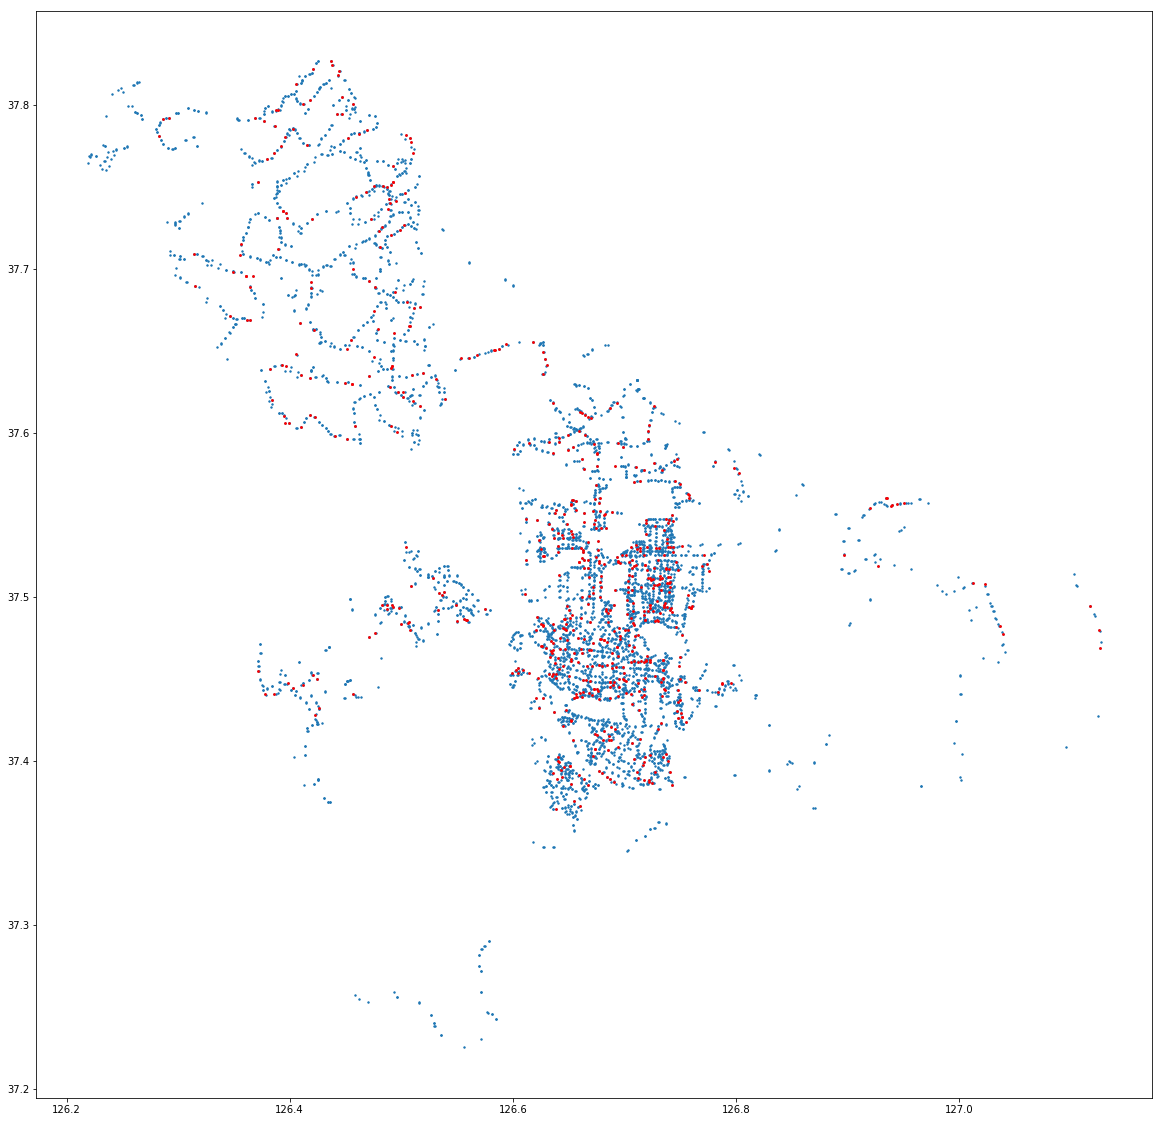

In [24]:
plt.figure(figsize=(20,20))
plt.scatter(x,y,s=2)
plt.scatter(x_,y_,s=3,c='red')

In [38]:
def net2implement_mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    from tqdm import tqdm
    e = np.exp(1)
    for stn1 in tqdm(G.nodes()):
        for stn2 in G.nodes():
            if stn1==stn2:continue
            try:
                value = -np.log(distance(stn1,stn2)+e)+(-G.edges[(stn1,stn2)]['demand'])
            except:
                value = -np.log(distance(stn1,stn2)+e)
            mat[node_list.index(stn1),node_list.index(stn2)] = value
    
    np.fill_diagonal(mat, sum(mat)/(len(node_list)*(len(node_list))-1))
        
    return node_list,mat

In [39]:
node_idx,matrix3 = net2implement_mat(demand_network)


  2%|█▉                                                                             | 135/5582 [01:23<49:04,  1.85it/s]


  5%|███▊                                                                           | 271/5582 [02:33<48:41,  1.82it/s]


  7%|█████▊                                                                         | 407/5582 [03:48<46:49,  1.84it/s]


 10%|███████▋                                                                       | 543/5582 [05:12<54:59,  1.53it/s]


 12%|█████████▌                                                                     | 679/5582 [06:34<47:46,  1.71it/s]


 15%|███████████▌                                                                   | 815/5582 [07:52<43:59,  1.81it/s]


 17%|█████████████▍                                                                 | 951/5582 [09:11<41:54,  1.84it/s]


 19%|███████████████▏                                                              | 1087/5582 [10:35<43:12,  1.73it/s]


 22%|█████████████████                                                             | 1223/5582 [12:00<43:21,  1.68it/s]


 24%|██████████████████▉                                                           | 1359/5582 [13:25<45:59,  1.53it/s]


 27%|████████████████████▉                                                         | 1495/5582 [14:53<46:08,  1.48it/s]


 29%|██████████████████████▊                                                       | 1631/5582 [16:25<42:57,  1.53it/s]


 32%|████████████████████████▋                                                     | 1767/5582 [17:59<42:34,  1.49it/s]


 34%|██████████████████████████▌                                                   | 1903/5582 [19:32<47:32,  1.29it/s]


 37%|████████████████████████████▍                                                 | 2039/5582 [21:10<42:20,  1.39it/s]


 39%|██████████████████████████████▍                                               | 2175/5582 [22:47<40:26,  1.40it/s]


 41%|████████████████████████████████▎                                             | 2311/5582 [24:29<40:41,  1.34it/s]


 44%|██████████████████████████████████▏                                           | 2447/5582 [26:14<38:22,  1.36it/s]


 46%|████████████████████████████████████                                          | 2583/5582 [27:57<37:46,  1.32it/s]


 49%|█████████████████████████████████████▉                                        | 2719/5582 [29:46<36:11,  1.32it/s]


 51%|███████████████████████████████████████▉                                      | 2855/5582 [31:36<38:46,  1.17it/s]


 54%|█████████████████████████████████████████▊                                    | 2991/5582 [33:26<35:33,  1.21it/s]


 56%|███████████████████████████████████████████▋                                  | 3127/5582 [35:20<35:40,  1.15it/s]


 58%|█████████████████████████████████████████████▌                                | 3263/5582 [37:20<32:04,  1.21it/s]


 61%|███████████████████████████████████████████████▍                              | 3399/5582 [39:17<29:56,  1.22it/s]


 63%|█████████████████████████████████████████████████▍                            | 3535/5582 [41:19<29:18,  1.16it/s]


 66%|███████████████████████████████████████████████████▎                          | 3671/5582 [43:23<27:57,  1.14it/s]


 68%|█████████████████████████████████████████████████████▏                        | 3807/5582 [45:27<26:11,  1.13it/s]


 71%|███████████████████████████████████████████████████████                       | 3943/5582 [47:36<25:21,  1.08it/s]


 73%|████████████████████████████████████████████████████████▉                     | 4079/5582 [49:45<22:58,  1.09it/s]


 76%|██████████████████████████████████████████████████████████▉                   | 4215/5582 [52:02<21:38,  1.05it/s]


 78%|████████████████████████████████████████████████████████████▊                 | 4351/5582 [54:22<24:19,  1.19s/it]


 80%|██████████████████████████████████████████████████████████████▋               | 4487/5582 [56:50<20:31,  1.12s/it]


 83%|████████████████████████████████████████████████████████████████▌             | 4623/5582 [59:13<16:35,  1.04s/it]


 85%|████████████████████████████████████████████████████████████████▊           | 4759/5582 [1:01:41<16:14,  1.18s/it]


 88%|██████████████████████████████████████████████████████████████████▋         | 4895/5582 [1:04:08<11:42,  1.02s/it]


 90%|████████████████████████████████████████████████████████████████████▍       | 5031/5582 [1:06:54<11:17,  1.23s/it]


 93%|██████████████████████████████████████████████████████████████████████▎     | 5167/5582 [1:09:32<07:40,  1.11s/it]


 95%|████████████████████████████████████████████████████████████████████████▏   | 5303/5582 [1:12:14<05:33,  1.20s/it]


 97%|██████████████████████████████████████████████████████████████████████████  | 5439/5582 [1:14:58<03:29,  1.47s/it]


100%|███████████████████████████████████████████████████████████████████████████▉| 5575/5582 [1:17:46<00:07,  1.11s/it]


100%|████████████████████████████████████████████████████████████████████████████| 5582/5582 [1:17:54<00:00,  1.19s/it]


In [40]:
model3 = AffinityPropagation(affinity = 'precomputed')
model3.fit(matrix3)

AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [41]:
len(model3.cluster_centers_indices_)

299

In [42]:
x_ = []
y_ = []
for idx in model2.cluster_centers_indices_:
    try:
        x_.append(stn_info[node_idx[idx]]['lonlat'][0])
        y_.append(stn_info[node_idx[idx]]['lonlat'][1])
    except IndexError:
        continue

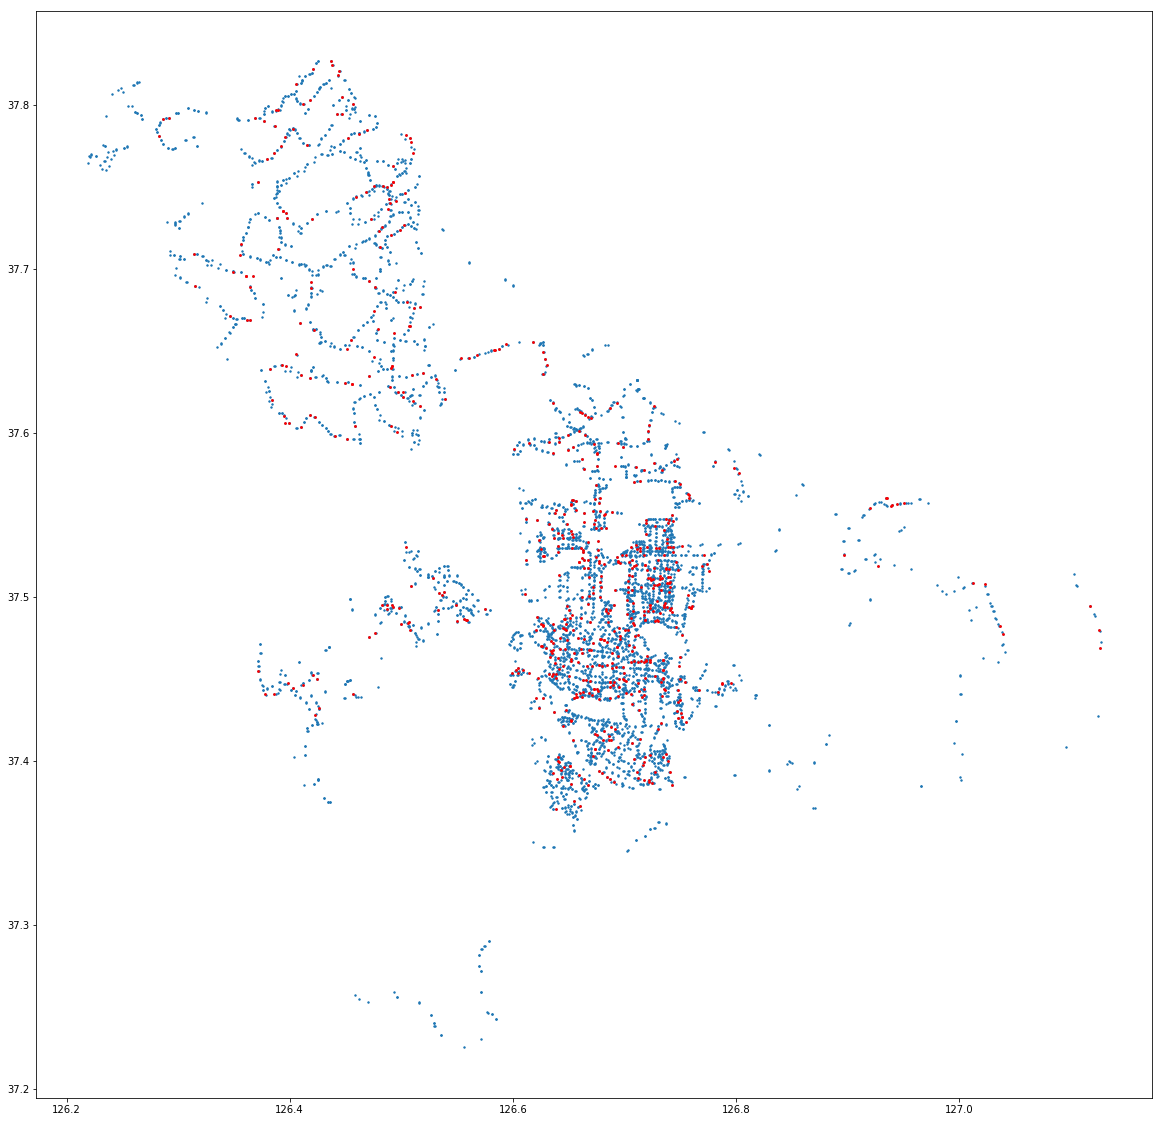

In [43]:
plt.figure(figsize=(20,20))
plt.scatter(x,y,s=2)
plt.scatter(x_,y_,s=3,c='red')

In [44]:
def net2implement_mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    from tqdm import tqdm
    e = np.exp(1)
    for stn1 in tqdm(G.nodes()):
        for stn2 in G.nodes():
            if stn1==stn2:continue
            try:
                value = -(np.log(distance(stn1,stn2)+e)*G.edges[(stn1,stn2)]['demand'])
            except:
                value = -np.log(distance(stn1,stn2)+e)
            mat[node_list.index(stn1),node_list.index(stn2)] = value
    
    np.fill_diagonal(mat, sum(mat)/(len(node_list)*(len(node_list))-1))
        
    return node_list,mat

In [45]:
node_idx,matrix4 = net2implement_mat(demand_network)


  2%|█▉                                                                             | 135/5582 [01:08<44:10,  2.05it/s]


  5%|███▊                                                                           | 271/5582 [02:21<55:50,  1.59it/s]


  7%|█████▊                                                                         | 407/5582 [03:37<49:07,  1.76it/s]


 10%|███████▋                                                                       | 543/5582 [04:58<39:50,  2.11it/s]


 12%|█████████▎                                                                   | 679/5582 [06:41<1:06:43,  1.22it/s]


 15%|███████████▌                                                                   | 815/5582 [08:28<54:18,  1.46it/s]


 17%|█████████████▍                                                                 | 951/5582 [10:04<42:41,  1.81it/s]


 19%|███████████████▏                                                              | 1087/5582 [11:34<49:04,  1.53it/s]


 22%|█████████████████                                                             | 1223/5582 [13:05<42:49,  1.70it/s]


 24%|██████████████████▉                                                           | 1359/5582 [14:39<43:21,  1.62it/s]


 27%|████████████████████▉                                                         | 1495/5582 [16:10<50:15,  1.36it/s]


 29%|██████████████████████▊                                                       | 1631/5582 [17:53<45:34,  1.44it/s]


 32%|████████████████████████▋                                                     | 1767/5582 [19:37<48:38,  1.31it/s]


 34%|██████████████████████████▌                                                   | 1903/5582 [21:17<51:23,  1.19it/s]


 37%|████████████████████████████▍                                                 | 2039/5582 [23:03<42:35,  1.39it/s]


 39%|██████████████████████████████▍                                               | 2175/5582 [24:46<36:12,  1.57it/s]


 41%|████████████████████████████████▎                                             | 2311/5582 [26:33<48:17,  1.13it/s]


 44%|██████████████████████████████████▏                                           | 2447/5582 [28:26<42:35,  1.23it/s]


 46%|████████████████████████████████████                                          | 2583/5582 [30:25<46:40,  1.07it/s]


 49%|█████████████████████████████████████▉                                        | 2719/5582 [32:24<41:54,  1.14it/s]


 51%|███████████████████████████████████████▉                                      | 2855/5582 [34:21<39:28,  1.15it/s]


 54%|█████████████████████████████████████████▊                                    | 2991/5582 [36:26<40:30,  1.07it/s]


 56%|███████████████████████████████████████████▋                                  | 3127/5582 [38:33<39:51,  1.03it/s]


 58%|█████████████████████████████████████████████▌                                | 3263/5582 [40:43<38:42,  1.00s/it]


 61%|███████████████████████████████████████████████▍                              | 3399/5582 [42:53<30:50,  1.18it/s]


 63%|█████████████████████████████████████████████████▍                            | 3535/5582 [45:12<52:09,  1.53s/it]


 66%|███████████████████████████████████████████████████▎                          | 3671/5582 [47:30<32:14,  1.01s/it]


 68%|█████████████████████████████████████████████████████▏                        | 3807/5582 [49:55<27:54,  1.06it/s]


 71%|███████████████████████████████████████████████████████                       | 3943/5582 [52:19<26:57,  1.01it/s]


 73%|████████████████████████████████████████████████████████▉                     | 4079/5582 [54:41<22:17,  1.12it/s]


 76%|██████████████████████████████████████████████████████████▉                   | 4215/5582 [57:07<19:33,  1.17it/s]


 78%|████████████████████████████████████████████████████████████▊                 | 4351/5582 [59:15<19:54,  1.03it/s]


 80%|█████████████████████████████████████████████████████████████               | 4487/5582 [1:01:43<21:25,  1.17s/it]


 83%|██████████████████████████████████████████████████████████████▉             | 4623/5582 [1:04:06<14:15,  1.12it/s]


 85%|████████████████████████████████████████████████████████████████▊           | 4759/5582 [1:06:34<17:26,  1.27s/it]


 88%|██████████████████████████████████████████████████████████████████▋         | 4895/5582 [1:08:53<13:25,  1.17s/it]


 90%|████████████████████████████████████████████████████████████████████▍       | 5031/5582 [1:11:33<10:57,  1.19s/it]


 93%|██████████████████████████████████████████████████████████████████████▎     | 5167/5582 [1:13:57<06:33,  1.06it/s]


 95%|████████████████████████████████████████████████████████████████████████▏   | 5303/5582 [1:16:12<06:03,  1.30s/it]


 97%|██████████████████████████████████████████████████████████████████████████  | 5439/5582 [1:18:27<02:15,  1.06it/s]


100%|███████████████████████████████████████████████████████████████████████████▉| 5575/5582 [1:21:12<00:10,  1.52s/it]


100%|████████████████████████████████████████████████████████████████████████████| 5582/5582 [1:21:22<00:00,  1.29s/it]


In [46]:
model4 = AffinityPropagation(affinity = 'precomputed')
model4.fit(matrix4)

AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [47]:
len(model4.cluster_centers_indices_)

305

In [18]:
def net2implement_mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    from tqdm import tqdm
    for stn1 in tqdm(G.nodes()):
        for stn2 in G.nodes():
            if stn1==stn2:continue
            try:
                value = -np.log(distance(stn1,stn2))*G.edges[(stn1,stn2)]['demand']
            except:
                value = -distance(stn1,stn2)
            mat[node_list.index(stn1),node_list.index(stn2)] = value
    
    np.fill_diagonal(mat, sum(mat)/(len(node_list)*(len(node_list))-1))
        
    return node_list,mat

node_idx,matrix2 = net2implement_mat(demand_network)
model2 = AffinityPropagation(affinity = 'precomputed')
model2.fit(matrix2)
center = model2.cluster_centers_indices_
np.savez('logdist_dot_demand',center=center,labels=model2.labels_)

100%|██████████████████████████████████████████████████████████████████████████████| 5582/5582 [51:51<00:00,  1.24it/s]


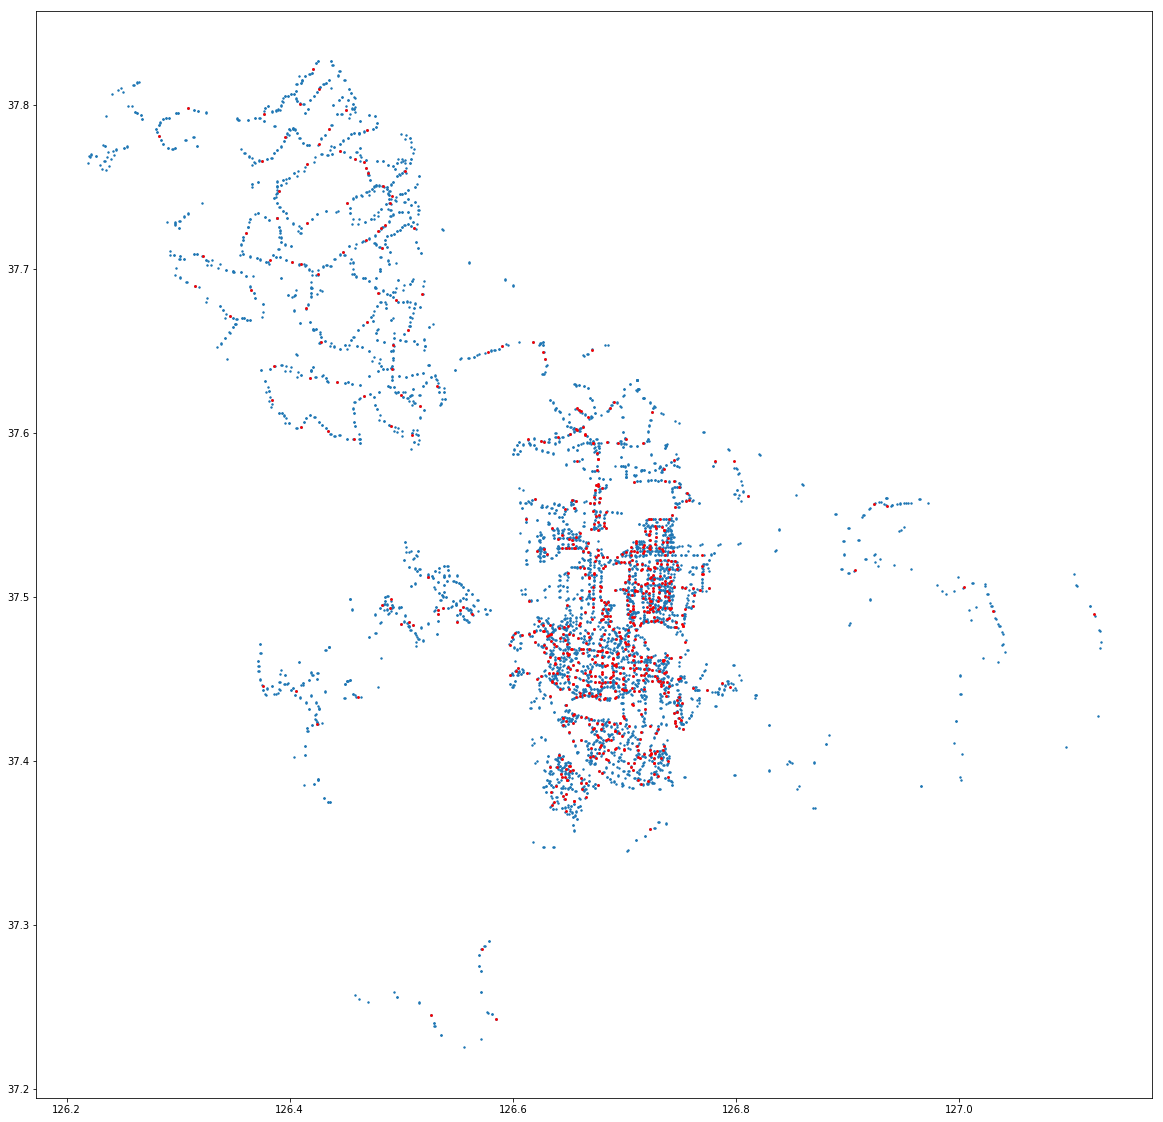

In [19]:
x_ = []
y_ = []
for idx in model2.cluster_centers_indices_:
    try:
        x_.append(stn_info[node_idx[idx]]['lonlat'][0])
        y_.append(stn_info[node_idx[idx]]['lonlat'][1])
    except IndexError:
        continue
plt.figure(figsize=(20,20))
plt.scatter(x,y,s=2)
plt.scatter(x_,y_,s=3,c='red')

In [20]:
def net2implement_mat(G):
    node_list = list(G.nodes())
    mat = np.zeros((len(node_list),len(node_list)))
    from tqdm import tqdm
    for stn1 in tqdm(G.nodes()):
        for stn2 in G.nodes():
            if stn1==stn2:continue
            try:
                value = -distance(stn1,stn2)*np.log(G.edges[(stn1,stn2)]['demand'])
            except:
                value = -distance(stn1,stn2)
            mat[node_list.index(stn1),node_list.index(stn2)] = value
    
    np.fill_diagonal(mat, sum(mat)/(len(node_list)*(len(node_list))-1))
        
    return node_list,mat

node_idx,matrix3 = net2implement_mat(demand_network)
model3 = AffinityPropagation(affinity = 'precomputed')
model3.fit(matrix3)
center = model3.cluster_centers_indices_
np.savez('dist_dot_logdemand',center=center,labels=model3.labels_)

100%|██████████████████████████████████████████████████████████████████████████████| 5582/5582 [50:45<00:00,  1.27it/s]


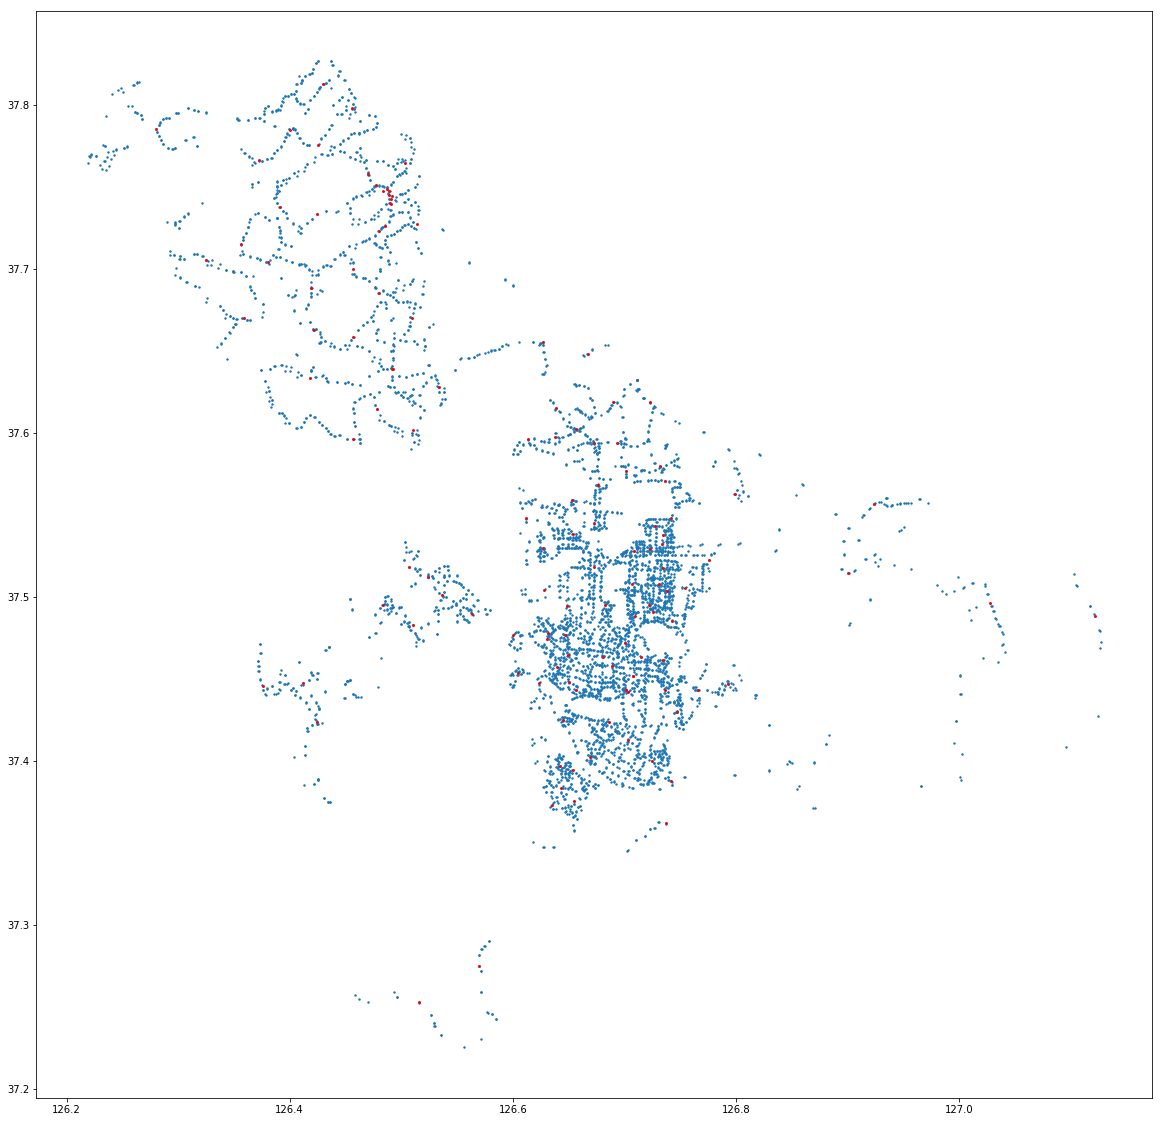

In [21]:
x_ = []
y_ = []
for idx in model3.cluster_centers_indices_:
    try:
        x_.append(stn_info[node_idx[idx]]['lonlat'][0])
        y_.append(stn_info[node_idx[idx]]['lonlat'][1])
    except IndexError:
        continue
plt.figure(figsize=(20,20))
plt.scatter(x,y,s=2)
plt.scatter(x_,y_,s=3,c='red')